In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/TA/coding/dataset/df_kominfo_raw.csv')
df_raw

,datetime,tweet id,username,username_len,content,len_of_text,mentioned user,number_of_reply,number_of_retweet,number_of_quote_retweet,...,avg_tweet_per_day,avg_fav_per_day,contain_picture,contain_video,contain_link,contain_hashtag,contain_upper,con_user_mentioned,opt_length,retweeted
0,2022-07-16 23:59:43+00:00,1548457382917058560,yaelahciwo_,11,"Itu yg kominfo bakal blokir WhatsApp, IG, Goog...",93,NaN,9,1,1,...,12.231884,1.434783,0,0,0,0,1,0,1,1
1,2022-07-16 23:58:33+00:00,1548457088971853824,LA12700057,10,TERUS KOMINFO NYURUH GW NGE-SHARE JADWAL GRUP ...,84,NaN,0,0,0,...,275.142857,323.285714,0,0,1,0,1,0,1,0
2,2022-07-16 23:58:28+00:00,1548457069338296320,Tryoska14,9,Tenang dulu. Yang dimaksud pemblokiran Kominfo...,240,NaN,0,0,0,...,0.166667,9.816667,1,0,0,0,1,0,0,0
3,2022-07-16 23:56:47+00:00,1548456642928590848,nenginuy,8,"Pilihan outfit buat hangout nih, Gaes. \n👉 htt...",196,NaN,0,0,0,...,5.016575,10.657459,1,0,1,1,1,0,0,0
4,2022-07-16 23:56:28+00:00,1548456563752386560,_kaka29F,8,Cek GS -Celana Jeans Zeniva Highwaist Cutbray ...,200,NaN,0,0,0,...,3.187500,0.406250,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2022-05-17 10:10:51+00:00,1526505519250558976,SydneyX5w,9,"Pertemuan Kedua DEWG G20, Indonesia Siapkan Pr...",205,"[User(username='PlateJohnny', id=1187281119978...",0,0,0,...,12.073195,8.478204,0,0,1,0,1,1,0,0
19996,2022-05-17 10:06:03+00:00,1526504309570932738,TechnologueID,13,Kominfo Ajak Operator Seluler Siap Bantu IMEI ...,150,NaN,0,0,0,...,10.929144,0.023619,0,0,1,1,1,0,0,0
19997,2022-05-17 10:02:00+00:00,1526503291605368832,knownjohan,10,Di pulau Jawa pun masih banyak pembuangan samp...,159,"[User(username='kemkominfo', id=177848697, dis...",0,0,0,...,11.188029,0.003388,0,0,1,0,1,1,0,0
19998,2022-05-17 10:00:02+00:00,1526502795020750849,bwifess,7,sepurane tweet e kepotong 🥲 kosan cewek di sek...,138,NaN,3,0,0,...,19.663366,0.013201,0,0,1,0,1,0,0,0


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 20000 non-null  object 
 1   tweet id                 20000 non-null  int64  
 2   username                 20000 non-null  object 
 3   username_len             20000 non-null  int64  
 4   content                  20000 non-null  object 
 5   len_of_text              20000 non-null  int64  
 6   mentioned user           15543 non-null  object 
 7   number_of_reply          20000 non-null  int64  
 8   number_of_retweet        20000 non-null  int64  
 9   number_of_quote_retweet  20000 non-null  int64  
 10  number_of_like           20000 non-null  int64  
 11  outlinks                 12641 non-null  object 
 12  media                    7549 non-null   object 
 13  no_follower              20000 non-null  int64  
 14  no_following          

# Pre-processing

1. create new dataframe with used columns, drop unused columns


In [ ]:
df = df_raw.copy()
df = df[['total_tweet','no_follower','no_following','age_of_account','no_of_favorite','avg_tweet_per_day','avg_fav_per_day','username_len','verified','len_of_text','opt_length','contain_picture','contain_video','contain_upper','contain_hashtag','con_user_mentioned','retweeted','sentimen']]
df

,total_tweet,no_follower,no_following,age_of_account,no_of_favorite,avg_tweet_per_day,avg_fav_per_day,username_len,verified,len_of_text,opt_length,contain_picture,contain_video,contain_upper,contain_hashtag,con_user_mentioned,retweeted,sentimen
0,844,31295,78,69,99,12.231884,1.434783,11,0,93,1,0,0,1,0,0,1,-1
1,5778,260,694,21,6789,275.142857,323.285714,10,0,84,1,0,0,1,0,0,0,0
2,20,0,4,120,1178,0.166667,9.816667,9,0,240,0,1,0,1,0,0,0,1
3,908,45,32,181,1929,5.016575,10.657459,8,0,196,0,1,0,1,1,0,0,0
4,102,5,115,32,13,3.187500,0.406250,8,0,200,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,37113,11763,10425,3074,26062,12.073195,8.478204,9,0,205,0,0,0,1,0,1,0,1
19996,24525,1277,167,2244,53,10.929144,0.023619,13,0,150,0,0,0,1,1,0,0,1
19997,19814,257,1452,1771,6,11.188029,0.003388,10,0,159,0,0,0,1,0,1,0,-1
19998,17874,4902,757,909,12,19.663366,0.013201,7,0,138,0,0,0,1,0,0,0,1


2. create new columns by unique values of 'sentimen' cols

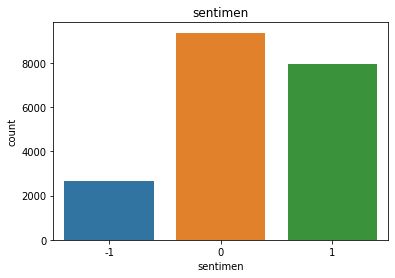

In [ ]:
# count plot on single categorical variable
sns.countplot(x ='sentimen', data = df)
plt.title("sentimen")
# Show the plot
plt.show()

In [ ]:
df = pd.get_dummies(data = df, columns = ['sentimen'])
df.head(5)

,total_tweet,no_follower,no_following,age_of_account,no_of_favorite,avg_tweet_per_day,avg_fav_per_day,username_len,verified,len_of_text,opt_length,contain_picture,contain_video,contain_upper,contain_hashtag,con_user_mentioned,retweeted,sentimen_-1,sentimen_0,sentimen_1
0,844,31295,78,69,99,12.231884,1.434783,11,0,93,1,0,0,1,0,0,1,1,0,0
1,5778,260,694,21,6789,275.142857,323.285714,10,0,84,1,0,0,1,0,0,0,0,1,0
2,20,0,4,120,1178,0.166667,9.816667,9,0,240,0,1,0,1,0,0,0,0,0,1
3,908,45,32,181,1929,5.016575,10.657459,8,0,196,0,1,0,1,1,0,0,0,1,0
4,102,5,115,32,13,3.187500,0.406250,8,0,200,0,1,0,1,1,0,0,0,1,0


In [ ]:
df.rename(columns = {'sentimen_1':'sen_positif', 'sentimen_0':'sen_netral','sentimen_-1':'sen_negatif'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   total_tweet         20000 non-null  int64  
 1   no_follower         20000 non-null  int64  
 2   no_following        20000 non-null  int64  
 3   age_of_account      20000 non-null  int64  
 4   no_of_favorite      20000 non-null  int64  
 5   avg_tweet_per_day   20000 non-null  float64
 6   avg_fav_per_day     20000 non-null  float64
 7   username_len        20000 non-null  int64  
 8   verified            20000 non-null  int64  
 9   len_of_text         20000 non-null  int64  
 10  opt_length          20000 non-null  int64  
 11  contain_picture     20000 non-null  int64  
 12  contain_video       20000 non-null  int64  
 13  contain_upper       20000 non-null  int64  
 14  contain_hashtag     20000 non-null  int64  
 15  con_user_mentioned  20000 non-null  int64  
 16  retw

3. scaling data

In [ ]:
df.describe()

,total_tweet,no_follower,no_following,age_of_account,no_of_favorite,avg_tweet_per_day,avg_fav_per_day,username_len,verified,len_of_text,opt_length,contain_picture,contain_video,contain_upper,contain_hashtag,con_user_mentioned,retweeted,sen_negatif,sen_netral,sen_positif
count,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,6.165029e+04,8.918915e+04,2669.039000,1578.786550,30081.092500,34.966493,20.169648,10.249500,0.03555,193.507700,0.081050,0.321050,0.056150,0.992650,0.128300,0.777950,0.151050,0.134100,0.468550,0.397350
std,1.690473e+05,9.309584e+05,3514.224242,1393.129968,85982.721842,53.934809,38.699394,2.537138,0.18517,66.439748,0.272919,0.466892,0.230217,0.085419,0.334432,0.415635,0.358107,0.340768,0.499022,0.489362
min,1.000000e+00,0.000000e+00,0.000000,7.000000,0.000000,0.005278,0.000000,4.000000,0.00000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.224000e+03,5.975000e+02,188.000000,492.000000,410.000000,6.175321,0.259762,9.000000,0.00000,141.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.650000e+04,1.535000e+03,1047.000000,1011.000000,4001.000000,20.295203,4.945479,10.000000,0.00000,205.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.878200e+04,6.739000e+03,3658.000000,2294.000000,11979.000000,39.897436,17.953125,12.000000,0.00000,247.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,2.185401e+06,1.860384e+07,67019.000000,5581.000000,711530.000000,888.859487,527.212987,15.000000,1.00000,332.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

col = ['total_tweet','no_follower','no_following','age_of_account','no_of_favorite','avg_tweet_per_day','avg_fav_per_day','username_len','len_of_text']
scaler = MinMaxScaler()
df[col] = scaler.fit_transform(df[col])
df

,total_tweet,no_follower,no_following,age_of_account,no_of_favorite,avg_tweet_per_day,avg_fav_per_day,username_len,verified,len_of_text,opt_length,contain_picture,contain_video,contain_upper,contain_hashtag,con_user_mentioned,retweeted,sen_negatif,sen_netral,sen_positif
0,0.000386,1.682179e-03,0.001164,0.011123,0.000139,0.013755,0.002721,0.636364,0,0.264615,1,0,0,1,0,0,1,1,0,0
1,0.002643,1.397561e-05,0.010355,0.002512,0.009541,0.309542,0.613198,0.545455,0,0.236923,1,0,0,1,0,0,0,0,1,0
2,0.000009,0.000000e+00,0.000060,0.020273,0.001656,0.000182,0.018620,0.454545,0,0.716923,0,1,0,1,0,0,0,0,0,1
3,0.000415,2.418855e-06,0.000477,0.031216,0.002711,0.005638,0.020215,0.363636,0,0.581538,0,1,0,1,1,0,0,0,1,0
4,0.000046,2.687617e-07,0.001716,0.004485,0.000018,0.003580,0.000771,0.363636,0,0.593846,0,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.016982,6.322887e-04,0.155553,0.550233,0.036628,0.013577,0.016081,0.454545,0,0.609231,0,0,0,1,0,1,0,0,0,1
19996,0.011222,6.864173e-05,0.002492,0.401328,0.000074,0.012290,0.000045,0.818182,0,0.440000,0,0,0,1,1,0,0,0,0,1
19997,0.009066,1.381435e-05,0.021665,0.316469,0.000008,0.012581,0.000006,0.545455,0,0.467692,0,0,0,1,0,1,0,1,0,0
19998,0.008178,2.634939e-04,0.011295,0.161823,0.000017,0.022116,0.000025,0.272727,0,0.403077,0,0,0,1,0,0,0,0,0,1


In [ ]:
df.describe()

,total_tweet,no_follower,no_following,age_of_account,no_of_favorite,avg_tweet_per_day,avg_fav_per_day,username_len,verified,len_of_text,opt_length,contain_picture,contain_video,contain_upper,contain_hashtag,con_user_mentioned,retweeted,sen_negatif,sen_netral,sen_positif
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.028210,0.004794,0.039825,0.281985,0.042277,0.039333,0.038257,0.568136,0.03555,0.573870,0.081050,0.321050,0.056150,0.992650,0.128300,0.777950,0.151050,0.134100,0.468550,0.397350
std,0.077353,0.050041,0.052436,0.249934,0.120842,0.060679,0.073404,0.230649,0.18517,0.204430,0.272919,0.466892,0.230217,0.085419,0.334432,0.415635,0.358107,0.340768,0.499022,0.489362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002848,0.000032,0.002805,0.087011,0.000576,0.006942,0.000493,0.454545,0.00000,0.412308,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.007550,0.000083,0.015622,0.180122,0.005623,0.022827,0.009380,0.545455,0.00000,0.609231,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.017745,0.000362,0.054582,0.410298,0.016836,0.044880,0.034053,0.727273,0.00000,0.738462,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x = df.drop('retweeted', axis = 1)
y = df['retweeted']

In [ ]:
# perbandingan retweet
y.value_counts()

0    16979
1     3021
Name: retweeted, dtype: int64

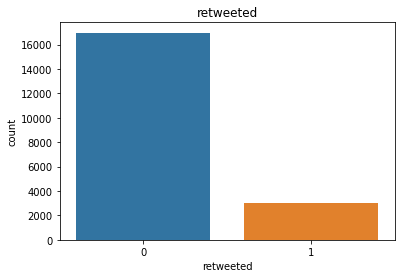

In [ ]:
sns.countplot(x ='retweeted', data = df)
plt.title("retweeted")
# Show the plot
plt.show()

# Ensemble Stacking Model

In [ ]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	models['rf'] = RandomForestClassifier()
	models['gb'] = GradientBoostingClassifier()  
	models['svm'] = SVC()
  
	models['stacking'] = get_stacking()
	return models

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('rf', RandomForestClassifier()))
	level0.append(('gb', GradientBoostingClassifier()))
	level0.append(('svm', SVC()))
	# define meta learner model
	level1 = SVC()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1)
	return model
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	scores = cross_validate(model, X, y, scoring=('accuracy','f1','precision','recall'), cv=10)
	return scores
 


# Scenario 1 : without resampling (imbalanced data)


In [ ]:
# pd.options.display.float_format = '{:.2%}'.format
# pd.reset_option('^display.', silent=True)

In [ ]:
print(x.shape)
print(y.shape)

(20000, 19)
(20000,)


In [ ]:
#Random Forest Imbalanced level-0
scoresRF_imbalanced = evaluate_model(RandomForestClassifier(),x, y)
scoresGB_imbalanced = evaluate_model(GradientBoostingClassifier(),x, y)
scoresSVM_imbalanced = evaluate_model(SVC(),x, y)

In [ ]:
#print out hasil Random Forest
allscoreRF_imbalanced = pd.DataFrame(scoresRF_imbalanced)
allscoreRF_imbalanced.loc['mean'] = allscoreRF_imbalanced.mean()
allscoreRF_imbalanced[['test_accuracy','test_f1','test_precision','test_recall']]

,test_accuracy,test_f1,test_precision,test_recall
0,85.85%,40.42%,55.81%,31.68%
1,87.15%,55.30%,58.24%,52.65%
2,85.95%,49.19%,54.18%,45.03%
3,86.70%,44.35%,60.23%,35.10%
4,85.25%,45.07%,51.49%,40.07%
5,85.70%,45.42%,53.60%,39.40%
6,85.65%,47.34%,53.09%,42.72%
7,86.80%,52.69%,57.42%,48.68%
8,86.70%,51.81%,57.20%,47.35%
9,84.85%,44.40%,49.79%,40.07%


In [ ]:
#print out hasil Gradient Boosting
allscoreGB_imbalanced = pd.DataFrame(scoresGB_imbalanced)
allscoreGB_imbalanced.loc['mean'] = allscoreGB_imbalanced.mean()
allscoreGB_imbalanced[['test_accuracy','test_f1','test_precision','test_recall']]

,test_accuracy,test_f1,test_precision,test_recall
0,86.90%,29.57%,79.71%,18.15%
1,90.45%,56.88%,89.36%,41.72%
2,89.30%,49.29%,86.67%,34.44%
3,87.40%,30.77%,90.32%,18.54%
4,87.05%,36.36%,70.48%,24.50%
5,88.20%,40.10%,85.87%,26.16%
6,88.80%,45.10%,86.79%,30.46%
7,89.60%,49.51%,92.73%,33.77%
8,89.30%,49.05%,87.29%,34.11%
9,88.80%,46.41%,83.62%,32.12%


In [ ]:
#print out hasil SVM
allscoreSVM_imbalanced = pd.DataFrame(scoresSVM_imbalanced)
allscoreSVM_imbalanced.loc['mean'] = allscoreSVM_imbalanced.mean()
allscoreSVM_imbalanced[['test_accuracy','test_f1','test_precision','test_recall']]

,test_accuracy,test_f1,test_precision,test_recall
0,86.00%,19.08%,76.74%,10.89%
1,86.55%,26.70%,75.38%,16.23%
2,86.55%,25.90%,77.05%,15.56%
3,85.30%,15.03%,59.09%,8.61%
4,85.55%,21.25%,60.00%,12.91%
5,85.60%,21.74%,60.61%,13.25%
6,86.15%,21.08%,75.51%,12.25%
7,86.60%,28.72%,72.97%,17.88%
8,86.60%,31.98%,68.48%,20.86%
9,85.75%,20.61%,64.91%,12.25%


In [ ]:
scoresStacking_imbalanced = evaluate_model(get_stacking(),x, y)

In [ ]:
allscore_imbalanced = pd.DataFrame(scoresStacking_imbalanced)
allscore_imbalanced.loc['mean'] = allscore_imbalanced.mean()
allscore_imbalanced[['test_accuracy','test_f1','test_precision','test_recall']]

,test_accuracy,test_f1,test_precision,test_recall
0,86.60%,24.72%,83.02%,14.52%
1,90.05%,52.51%,94.02%,36.42%
2,89.10%,45.50%,92.86%,30.13%
3,87.10%,26.29%,95.83%,15.23%
4,87.25%,32.00%,82.19%,19.87%
5,88.10%,37.37%,91.03%,23.51%
6,88.75%,41.86%,95.29%,26.82%
7,89.50%,47.24%,97.92%,31.13%
8,88.90%,46.38%,85.71%,31.79%
9,88.90%,43.37%,94.44%,28.15%


# Scenario 2: random undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_random, y_random = rus.fit_resample(x, y)
print(sorted(Counter(y_random).items()))

[(0, 3021), (1, 3021)]


In [ ]:
print(x_random.shape)
print(y_random.shape)

(6042, 19)
(6042,)


In [ ]:
df_random = x_random.copy()
df_random['retweeted'] = y_random
df_random

,total_tweet,no_follower,no_following,age_of_account,no_of_favorite,avg_tweet_per_day,avg_fav_per_day,username_len,verified,len_of_text,opt_length,contain_picture,contain_video,contain_upper,contain_hashtag,con_user_mentioned,sen_negatif,sen_netral,sen_positif,retweeted
0,0.59%,0.00%,0.56%,6.76%,0.97%,3.77%,3.41%,45.45%,0,90.15%,0,0,0,1,0,1,0,1,0,0
1,2.31%,0.03%,6.16%,22.53%,4.56%,4.50%,4.87%,90.91%,0,47.38%,0,0,0,1,0,1,0,0,1,0
2,0.53%,0.00%,0.53%,77.05%,0.18%,0.30%,0.06%,63.64%,0,30.77%,0,0,0,1,0,1,0,1,0,0
3,1.48%,0.00%,0.85%,100.00%,0.39%,0.65%,0.09%,45.45%,0,66.46%,0,1,0,1,0,1,0,0,1,0
4,0.25%,0.02%,5.46%,5.85%,0.07%,1.87%,0.30%,72.73%,0,83.08%,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6037,16.44%,0.43%,10.64%,53.18%,68.62%,13.60%,31.17%,45.45%,0,80.92%,0,1,0,1,0,1,1,0,0,1
6038,1.70%,0.06%,15.56%,55.02%,3.66%,1.36%,1.61%,45.45%,0,59.38%,0,1,0,1,0,1,0,0,1,1
6039,1.70%,0.06%,15.56%,55.02%,3.66%,1.36%,1.61%,45.45%,0,50.77%,0,1,0,1,0,1,0,1,0,1
6040,0.33%,0.01%,0.11%,40.72%,0.01%,0.36%,0.01%,72.73%,0,34.46%,0,1,0,1,0,1,0,1,0,1


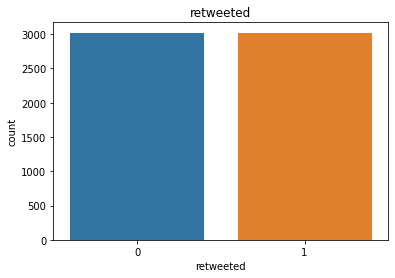

In [ ]:
sns.countplot(x ='retweeted', data = df_random)
plt.title("retweeted")
# Show the plot
plt.show()

In [ ]:
#undersampled level-0
scoresRF_random = evaluate_model(RandomForestClassifier(),x_random, y_random)
scoresGB_random = evaluate_model(GradientBoostingClassifier(),x_random, y_random)
scoresSVM_random = evaluate_model(SVC(),x_random, y_random)

In [ ]:
#print out hasil Random Forest
allscoreRF_random = pd.DataFrame(scoresRF_random)
allscoreRF_random.loc['mean'] = allscoreRF_random.mean()
allscoreRF_random[['test_accuracy','test_f1','test_precision','test_recall']]

,test_accuracy,test_f1,test_precision,test_recall
0,67.60%,63.84%,72.08%,57.28%
1,75.70%,74.87%,77.66%,72.28%
2,72.85%,72.94%,72.70%,73.18%
3,72.35%,69.80%,76.89%,63.91%
4,72.35%,71.65%,73.52%,69.87%
5,71.69%,71.26%,72.35%,70.20%
6,76.32%,76.05%,76.95%,75.17%
7,74.34%,74.38%,74.26%,74.50%
8,76.49%,76.25%,77.03%,75.50%
9,71.19%,68.82%,75.00%,63.58%


In [ ]:
#print out hasil Gradient Boosting
allscoreGB_random = pd.DataFrame(scoresGB_random)
allscoreGB_random.loc['mean'] = allscoreGB_random.mean()
allscoreGB_random[['test_accuracy','test_f1','test_precision','test_recall']]

,test_accuracy,test_f1,test_precision,test_recall
0,69.26%,66.67%,72.66%,61.59%
1,78.51%,78.83%,77.81%,79.87%
2,76.66%,77.58%,74.62%,80.79%
3,73.34%,70.99%,77.87%,65.23%
4,75.00%,74.54%,75.95%,73.18%
5,73.01%,72.70%,73.56%,71.85%
6,76.82%,76.90%,76.64%,77.15%
7,77.48%,77.99%,76.27%,79.80%
8,77.65%,77.98%,76.85%,79.14%
9,76.99%,76.48%,78.20%,74.83%


In [ ]:
#print out hasil SVM
allscoreSVM_random = pd.DataFrame(scoresSVM_random)
allscoreSVM_random.loc['mean'] = allscoreSVM_random.mean()
allscoreSVM_random[['test_accuracy','test_f1','test_precision','test_recall']]

,test_accuracy,test_f1,test_precision,test_recall
0,62.64%,61.30%,63.48%,59.27%
1,70.74%,70.74%,70.86%,70.63%
2,67.88%,68.20%,67.53%,68.87%
3,65.73%,64.25%,67.15%,61.59%
4,73.01%,74.00%,71.38%,76.82%
5,71.03%,72.18%,69.42%,75.17%
6,68.87%,69.77%,67.81%,71.85%
7,72.35%,72.93%,71.43%,74.50%
8,73.01%,73.92%,71.52%,76.49%
9,70.86%,70.96%,70.72%,71.19%


In [ ]:
scoresStacking_random2 = evaluate_model(get_stacking(),x_random, y_random)

In [ ]:
allscore_random = pd.DataFrame(scoresStacking_random2)
allscore_random.loc['mean'] = allscore_random.mean()
allscore_random[['test_accuracy','test_f1','test_precision','test_recall']]

,test_accuracy,test_f1,test_precision,test_recall
0,69.09%,67.02%,71.70%,62.91%
1,78.35%,78.90%,77.04%,80.86%
2,74.83%,75.80%,73.01%,78.81%
3,73.01%,71.25%,76.23%,66.89%
4,75.00%,75.61%,73.82%,77.48%
5,75.50%,76.28%,73.91%,78.81%
6,75.66%,76.48%,73.99%,79.14%
7,78.97%,80.00%,76.28%,84.11%
8,78.48%,78.76%,77.74%,79.80%
9,75.99%,75.87%,76.25%,75.50%


# Scenario 3 : Oversampling dengan SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
x_smote, y_smote = sm.fit_resample(x, y)
print(sorted(Counter(y_smote).items()))

[(0, 16979), (1, 16979)]


In [ ]:
print(x_smote.shape)
print(y_smote.shape)

(33958, 19)
(33958,)


In [ ]:
df_smote = x_smote.copy()
df_smote['retweeted'] = y_smote
df_smote

,total_tweet,no_follower,no_following,age_of_account,no_of_favorite,avg_tweet_per_day,avg_fav_per_day,username_len,verified,len_of_text,opt_length,contain_picture,contain_video,contain_upper,contain_hashtag,con_user_mentioned,sen_negatif,sen_netral,sen_positif,retweeted
0,0.04%,0.17%,0.12%,1.11%,0.01%,1.38%,0.27%,63.64%,0,26.46%,1,0,0,1,0,0,1,0,0,1
1,0.26%,0.00%,1.04%,0.25%,0.95%,30.95%,61.32%,54.55%,0,23.69%,1,0,0,1,0,0,0,1,0,0
2,0.00%,0.00%,0.01%,2.03%,0.17%,0.02%,1.86%,45.45%,0,71.69%,0,1,0,1,0,0,0,0,1,0
3,0.04%,0.00%,0.05%,3.12%,0.27%,0.56%,2.02%,36.36%,0,58.15%,0,1,0,1,1,0,0,1,0,0
4,0.00%,0.00%,0.17%,0.45%,0.00%,0.36%,0.08%,36.36%,0,59.38%,0,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33953,3.37%,0.11%,12.90%,25.01%,18.28%,5.91%,17.60%,36.36%,0,82.10%,0,0,0,1,0,1,0,0,1,1
33954,2.31%,0.03%,6.16%,22.53%,4.56%,4.50%,4.87%,90.91%,0,79.33%,0,1,0,1,0,1,0,0,1,1
33955,1.70%,0.06%,15.56%,55.02%,3.66%,1.36%,1.61%,45.45%,0,58.78%,0,0,0,1,0,1,0,0,1,1
33956,3.37%,0.11%,12.90%,25.01%,18.28%,5.91%,17.60%,36.36%,0,85.25%,0,1,0,1,0,1,1,0,0,1


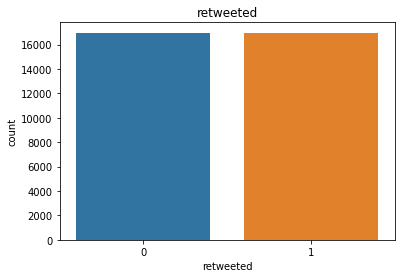

In [ ]:
sns.countplot(x ='retweeted', data = df_smote)
plt.title("retweeted")
# Show the plot
plt.show()

In [ ]:
#undersampled level-0
scoresRF_smote = evaluate_model(RandomForestClassifier(),x_smote, y_smote)
scoresGB_smote = evaluate_model(GradientBoostingClassifier(),x_smote, y_smote)
scoresSVM_smote = evaluate_model(SVC(),x_smote, y_smote)

In [ ]:
#print out hasil Random Forest
allscoreRF_smote = pd.DataFrame(scoresRF_smote)
allscoreRF_smote.loc['mean'] = allscoreRF_smote.mean()
allscoreRF_smote[['test_accuracy','test_f1','test_precision','test_recall']]

,test_accuracy,test_f1,test_precision,test_recall
0,78.15%,76.41%,83.01%,70.79%
1,79.98%,78.71%,84.02%,74.03%
2,87.72%,88.03%,85.84%,90.34%
3,89.52%,89.78%,87.57%,92.11%
4,87.90%,88.24%,85.81%,90.81%
5,88.07%,88.28%,86.80%,89.81%
6,88.60%,88.97%,86.20%,91.93%
7,88.60%,88.79%,87.35%,90.28%
8,88.19%,88.44%,86.62%,90.34%
9,87.19%,87.65%,84.59%,90.93%


In [ ]:
#print out hasil Gradient Boosting
allscoreGB_smote = pd.DataFrame(scoresGB_smote)
allscoreGB_smote.loc['mean'] = allscoreGB_smote.mean()
allscoreGB_smote[['test_accuracy','test_f1','test_precision','test_recall']]

,test_accuracy,test_f1,test_precision,test_recall
0,69.26%,66.67%,72.66%,61.59%
1,78.51%,78.83%,77.81%,79.87%
2,76.66%,77.58%,74.62%,80.79%
3,73.34%,70.99%,77.87%,65.23%
4,75.00%,74.54%,75.95%,73.18%
5,73.01%,72.70%,73.56%,71.85%
6,76.82%,76.90%,76.64%,77.15%
7,77.65%,78.12%,76.51%,79.80%
8,77.65%,77.98%,76.85%,79.14%
9,76.99%,76.48%,78.20%,74.83%


In [ ]:
#print out hasil SVM
allscoreSVM_smote = pd.DataFrame(scoresSVM_smote)
allscoreSVM_smote.loc['mean'] = allscoreSVM_smote.mean()
allscoreSVM_smote[['test_accuracy','test_f1','test_precision','test_recall']]

,test_accuracy,test_f1,test_precision,test_recall
0,62.64%,61.30%,63.48%,59.27%
1,70.74%,70.74%,70.86%,70.63%
2,67.88%,68.20%,67.53%,68.87%
3,65.73%,64.25%,67.15%,61.59%
4,73.01%,74.00%,71.38%,76.82%
5,71.03%,72.18%,69.42%,75.17%
6,68.87%,69.77%,67.81%,71.85%
7,72.35%,72.93%,71.43%,74.50%
8,73.01%,73.92%,71.52%,76.49%
9,70.86%,70.96%,70.72%,71.19%


In [ ]:
scoresStacking_smote = evaluate_model(get_stacking(),x_smote, y_smote)

In [ ]:
allscore_smote = pd.DataFrame(scoresStacking_smote)
allscore_smote.loc['mean'] = allscore_smote.mean()
allscore_smote[['test_accuracy','test_f1','test_precision','test_recall']]

,test_accuracy,test_f1,test_precision,test_recall
0,79.27%,77.45%,84.90%,71.20%
1,80.06%,78.92%,83.74%,74.62%
2,88.37%,88.68%,86.38%,91.11%
3,89.69%,89.87%,88.34%,91.46%
4,87.90%,88.21%,85.97%,90.58%
5,88.19%,88.41%,86.83%,90.05%
6,88.49%,88.93%,85.61%,92.52%
7,88.78%,89.02%,87.18%,90.93%
8,88.28%,88.54%,86.60%,90.58%
9,86.92%,87.43%,84.14%,90.98%
